# Salary Prediction using Simple Linear Regression

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Plotting the data

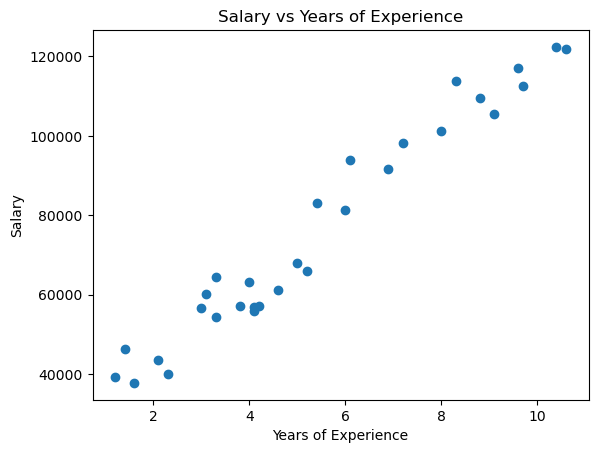

In [4]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.show()

In [5]:
x = df[['YearsExperience']]
y = df['Salary']

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [7]:
x.shape, y.shape

((30, 1), (30,))

In [8]:
# 80% training, 20% testing
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

# Standardize Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

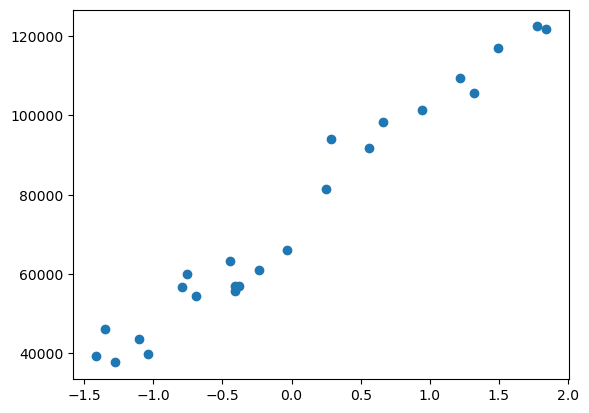

In [11]:
plt.scatter(x_train, y_train)
plt.show()

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [13]:
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
print("Slope: ", regressor.coef_)
print("Intercept: ", regressor.intercept_)

Slope:  [27151.53742583]
Intercept:  74208.625


# Plotting the best-fit line

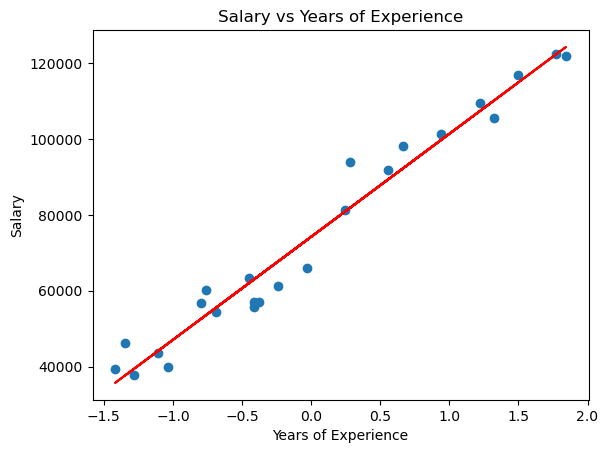

In [15]:
plt.scatter(x_train, y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Years of Experience")
plt.plot(x_train, regressor.predict(x_train), 'red')
plt.show()

In [16]:
y_pred_test = regressor.predict(x_test)

In [17]:
y_pred_test

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [18]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

In [19]:
print("Predicted Salaries: ", y_pred_test)

Predicted Salaries:  [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]


In [20]:
print("Actual Salaries: \n", list(y_test))

Actual Salaries: 
 [112636.0, 67939.0, 113813.0, 83089.0, 64446.0, 57190.0]


# Regression Metrics

# MSE, MAE, RMSE

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  49830096.85590836
Mean Absolute Error:  6286.453830757742
Root Mean Squared Error:  7059.043621901507


# R Square 

In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)

In [23]:
print("R Square: ", score)

R Square:  0.9024461774180498


# Adjusted R Square

In [24]:
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
print("Adjusted R Square: ", adjusted_r2)

Adjusted R Square:  0.8780577217725622


# Scaled Prediction

In [25]:
scaled_input = scaler.transform([[5]])

predicted_salary = regressor.predict(scaled_input)
print(predicted_salary)

[71499.27809463]


C:\Users\Shikhaj Somani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
